# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# list to hold Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, 
    # Country, Date
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
date= []
index = [0]
found_cities = []

# set count 
count = 1


url = "http://api.openweathermap.org/data/2.5/weather?"


In [53]:
# loop through each city 
print("Beginning Data Retriveal\n------------------------")
for c in cities: 
    query = url + "appid=" + weather_api_key + "&q=" + c + "&units=imperial"
    response = requests.get(query).json()
    time.sleep(0.5)
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        found_cities.append(c)
        print(f"Processing Record {count}| {c}")
        
    except: 
        
        print(f"{c} is not found. Skipping...")
        pass
    count += 1
print("------------------------\nData Retreival Complete\n------------------------")



Beginning Data Retriveal
------------------------
Processing Record 1| albany
Processing Record 2| punta arenas
Processing Record 3| haines junction
Processing Record 4| maloy
Processing Record 5| saint-philippe
Processing Record 6| gayny
Processing Record 7| rikitea
Processing Record 8| namatanai
Processing Record 9| saint-pierre
Processing Record 10| changping
Processing Record 11| busselton
Processing Record 12| whitehorse
warqla is not found. Skipping...
Processing Record 14| victoria
Processing Record 15| hermanus
Processing Record 16| diego de almagro
Processing Record 17| chuy
Processing Record 18| lebu
illoqqortoormiut is not found. Skipping...
Processing Record 20| isangel
Processing Record 21| faanui
Processing Record 22| mogadishu
Processing Record 23| longyearbyen
Processing Record 24| bengkulu
Processing Record 25| bambous virieux
Processing Record 26| tuktoyaktuk
Processing Record 27| labytnangi
Processing Record 28| westport
Processing Record 29| port elizabeth
Processin

Processing Record 255| spas-klepiki
Processing Record 256| santa cruz
Processing Record 257| saskylakh
Processing Record 258| burnie
Processing Record 259| vao
Processing Record 260| hami
Processing Record 261| lompoc
samusu is not found. Skipping...
Processing Record 263| cabo san lucas
Processing Record 264| souillac
Processing Record 265| manoel urbano
Processing Record 266| kholodnyy
Processing Record 267| belaya gora
Processing Record 268| aloleng
Processing Record 269| torrijos
Processing Record 270| ixtapa
Processing Record 271| andilamena
sigerfjord is not found. Skipping...
Processing Record 273| huarmey
Processing Record 274| peterhead
Processing Record 275| niamey
Processing Record 276| sawtell
bargal is not found. Skipping...
Processing Record 278| gamboma
Processing Record 279| rio gallegos
Processing Record 280| smithers
Processing Record 281| henties bay
Processing Record 282| chumikan
Processing Record 283| the valley
Processing Record 284| christchurch
Processing Recor

Processing Record 509| shimoda
Processing Record 510| wuwei
Processing Record 511| maniwaki
Processing Record 512| northam
Processing Record 513| angoche
Processing Record 514| big spring
kamenskoye is not found. Skipping...
Processing Record 516| bandarbeyla
Processing Record 517| fonte boa
Processing Record 518| maningrida
Processing Record 519| dzilam gonzalez
Processing Record 520| tilichiki
Processing Record 521| broome
Processing Record 522| mareeba
Processing Record 523| sal rei
mahadday weyne is not found. Skipping...
Processing Record 525| poli
Processing Record 526| faya
milingimbi is not found. Skipping...
Processing Record 528| constitucion
Processing Record 529| flinders
Processing Record 530| port-gentil
Processing Record 531| batticaloa
Processing Record 532| raga
Processing Record 533| dingle
Processing Record 534| manhattan
Processing Record 535| auray
Processing Record 536| mazara del vallo
Processing Record 537| padang
Processing Record 538| logan lake
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
cityDataDF = pd.DataFrame(
    {
    "City": found_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": windSpeed,
    "Country": country,
    "Date": date
    }
)
cityDataDF.to_csv("Output/cityData.csv", index=False, header=True)
cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,49.68,68,97,5.59,US,1635032133
1,punta arenas,-53.1500,-70.9167,35.71,87,90,27.63,CL,1635031999
2,haines junction,60.7522,-137.5108,39.15,70,71,0.00,CA,1635032068
3,maloy,61.9353,5.1136,49.73,80,100,13.00,NO,1635032146
4,saint-philippe,-21.3585,55.7679,72.99,84,58,11.81,RE,1635032014


In [55]:
cityDataDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,21.334668,20.974851,59.009007,73.398936,57.994681,7.935496,1.635032e+09
std,33.043557,89.307389,20.576772,18.446661,36.801252,5.594852,1.649907e+02
min,-54.800000,-175.200000,-6.650000,15.000000,0.000000,0.000000,1.635032e+09
25%,-5.116625,-59.673975,44.357500,64.750000,20.000000,3.440000,1.635032e+09
50%,25.313500,24.401500,61.215000,77.500000,68.000000,6.910000,1.635032e+09
75%,49.780025,95.424975,76.837500,87.000000,94.000000,11.290000,1.635033e+09
max,78.218600,179.316700,99.410000,100.000000,100.000000,29.510000,1.635033e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
# Check number of cities in cityDataDF
len(cityDataDF["City"].unique())

564

In [57]:
#  Get the indices of cities that have humidity over 100%.
humidity_100 = cityDataDF.loc[cityDataDF["Humidity"] > 100]
humidity_100.index

Int64Index([], dtype='int64')

In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanCityDataDF = cityDataDF[cityDataDF["Humidity"].isin(humidity_100)==False]
cleanCityDataDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,49.68,68,97,5.59,US,1635032133
1,punta arenas,-53.1500,-70.9167,35.71,87,90,27.63,CL,1635031999
2,haines junction,60.7522,-137.5108,39.15,70,71,0.00,CA,1635032068
3,maloy,61.9353,5.1136,49.73,80,100,13.00,NO,1635032146
4,saint-philippe,-21.3585,55.7679,72.99,84,58,11.81,RE,1635032014
...,...,...,...,...,...,...,...,...,...
559,kikwit,-5.0410,18.8162,71.08,96,48,1.10,CD,1635032650
560,vlakhiotis,36.8667,22.7000,67.17,64,8,2.89,GR,1635032651
561,slave lake,55.2834,-114.7690,33.78,93,90,11.50,CA,1635032652
562,shvartsevskiy,54.0961,37.9917,39.43,71,55,14.45,RU,1635032653


In [59]:
# Check length of cities in clean DataFrame
len(cleanCityDataDF["City"])


564

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

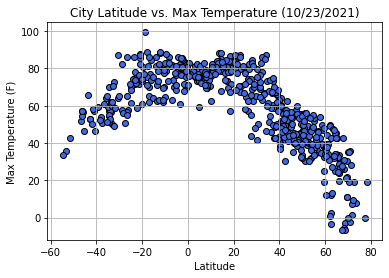

In [61]:
# create scatter plot of city latitude vs Max Temperature
plt.scatter(cleanCityDataDF ["Lat"], cleanCityDataDF ["Max Temp"], facecolors = "royalblue", edgecolors="black")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/23/2021)")
plt.grid()
plt.savefig("Output/cityLatvsTemp.png")
plt.show()




## Latitude vs. Humidity Plot

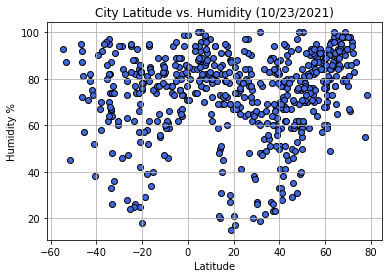

In [62]:
# create scatter plot of city latitude vs humidity
plt.scatter(cleanCityDataDF ["Lat"], cleanCityDataDF ["Humidity"], facecolors = "royalblue", edgecolors="black")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (10/23/2021)")
plt.grid()
plt.savefig("Output/city_LatVsHumidity.png")
plt.show()



## Latitude vs. Cloudiness Plot

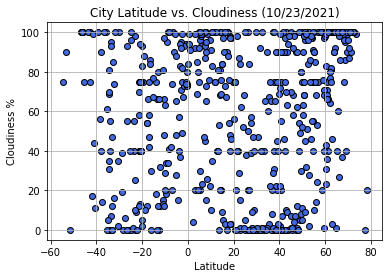

In [63]:
# create scatter plot of city latitude vs cloudiness
plt.scatter(cleanCityDataDF ["Lat"], cleanCityDataDF ["Cloudiness"], facecolors = "royalblue", edgecolors="black")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (10/23/2021)")
plt.grid()
plt.savefig("Output/city_LatVsClouds.png")
plt.show()


## Latitude vs. Wind Speed Plot

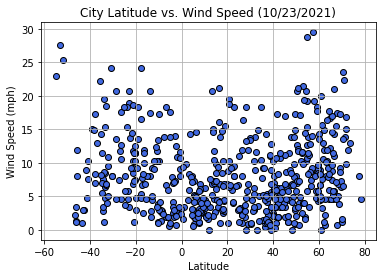

In [64]:
# create scatter plot of city latitude vs wind speed
plt.scatter(cleanCityDataDF ["Lat"], cleanCityDataDF ["Wind Speed"], facecolors = "royalblue", edgecolors="black")

# scatter plot labels

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/23/2021)")
plt.grid()
plt.savefig("Output/city_LatVsWind.png")
plt.show()


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


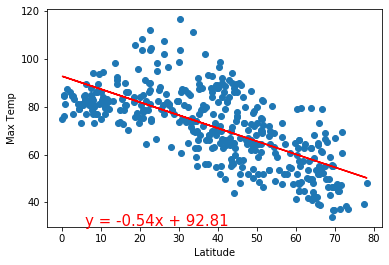

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


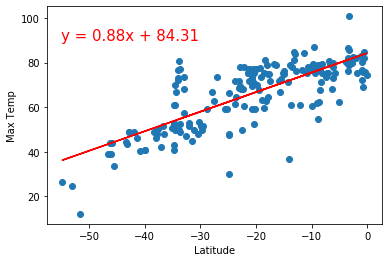

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


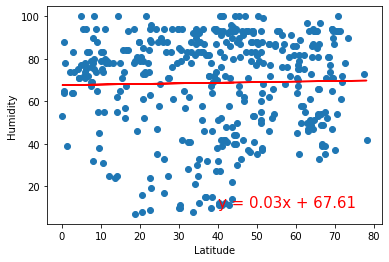

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


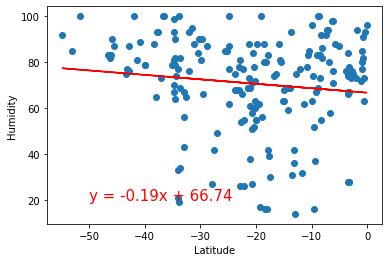

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


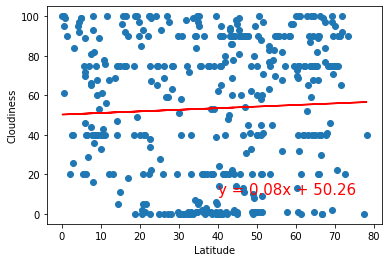

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


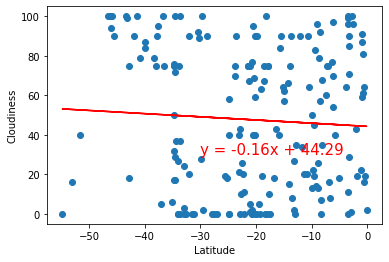

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


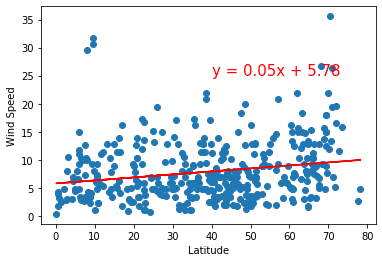

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


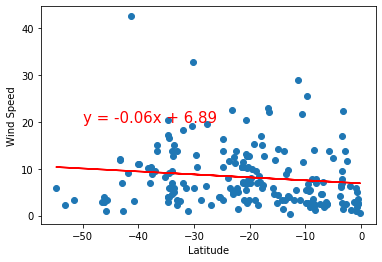